In [9]:
from watermark import watermark
# Imports
import sys
import os
import platform

import pandas as pd
import numpy as np
import sklearn as sk
from pathlib import Path

from pandas.tseries.offsets import DateOffset

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC                       #  Linear Support Vector Classifier (SVC)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from sklearn import svm                                 #  support vector machine (SVM) learning method

from sklearn.metrics import (classification_report, 
                             balanced_accuracy_score, 
                             confusion_matrix,
                             roc_auc_score, 
                             f1_score)

from imblearn.metrics import classification_report_imbalanced

import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle                                          # method for save trained/fit model/s
import joblib                                          # method for save trained/fit model/s

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Report Technologies
print(f'Python Platform: {platform.platform()}')
print(f'Python {sys.version}')
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Python Platform: macOS-13.0.1-arm64-arm-64bit
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]
Last updated: 2022-12-15T20:29:06.942695-06:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.6.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

matplotlib: 3.5.3
sys       : 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]
platform  : 1.0.8
numpy     : 1.21.5
pandas    : 1.5.1
hvplot    : 0.8.2
sklearn   : 1.1.3
seaborn   : 0.12.0
joblib    : 1.1.1



In [3]:
# create a directory to store and save trained models
# os.mkdir('Resources_models')

# Read in original complete dataset

In [4]:
# This is a compression='gzip' file
two_clients_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018Q4.csv.gz'), 
    compression='gzip', 
    low_memory=False)

# Review the DataFrame
display(two_clients_df.shape)
display(two_clients_df.head(3))


(2260701, 151)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop duplicate rows
two_clients_df.drop_duplicates()
display(two_clients_df.shape)

(2260701, 151)

In [6]:
# check for duplicated columns
two_clients_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
# identify keys
for col in two_clients_df.columns:
    display(col)

'id'

'member_id'

'loan_amnt'

'funded_amnt'

'funded_amnt_inv'

'term'

'int_rate'

'installment'

'grade'

'sub_grade'

'emp_title'

'emp_length'

'home_ownership'

'annual_inc'

'verification_status'

'issue_d'

'loan_status'

'pymnt_plan'

'url'

'desc'

'purpose'

'title'

'zip_code'

'addr_state'

'dti'

'delinq_2yrs'

'earliest_cr_line'

'fico_range_low'

'fico_range_high'

'inq_last_6mths'

'mths_since_last_delinq'

'mths_since_last_record'

'open_acc'

'pub_rec'

'revol_bal'

'revol_util'

'total_acc'

'initial_list_status'

'out_prncp'

'out_prncp_inv'

'total_pymnt'

'total_pymnt_inv'

'total_rec_prncp'

'total_rec_int'

'total_rec_late_fee'

'recoveries'

'collection_recovery_fee'

'last_pymnt_d'

'last_pymnt_amnt'

'next_pymnt_d'

'last_credit_pull_d'

'last_fico_range_high'

'last_fico_range_low'

'collections_12_mths_ex_med'

'mths_since_last_major_derog'

'policy_code'

'application_type'

'annual_inc_joint'

'dti_joint'

'verification_status_joint'

'acc_now_delinq'

'tot_coll_amt'

'tot_cur_bal'

'open_acc_6m'

'open_act_il'

'open_il_12m'

'open_il_24m'

'mths_since_rcnt_il'

'total_bal_il'

'il_util'

'open_rv_12m'

'open_rv_24m'

'max_bal_bc'

'all_util'

'total_rev_hi_lim'

'inq_fi'

'total_cu_tl'

'inq_last_12m'

'acc_open_past_24mths'

'avg_cur_bal'

'bc_open_to_buy'

'bc_util'

'chargeoff_within_12_mths'

'delinq_amnt'

'mo_sin_old_il_acct'

'mo_sin_old_rev_tl_op'

'mo_sin_rcnt_rev_tl_op'

'mo_sin_rcnt_tl'

'mort_acc'

'mths_since_recent_bc'

'mths_since_recent_bc_dlq'

'mths_since_recent_inq'

'mths_since_recent_revol_delinq'

'num_accts_ever_120_pd'

'num_actv_bc_tl'

'num_actv_rev_tl'

'num_bc_sats'

'num_bc_tl'

'num_il_tl'

'num_op_rev_tl'

'num_rev_accts'

'num_rev_tl_bal_gt_0'

'num_sats'

'num_tl_120dpd_2m'

'num_tl_30dpd'

'num_tl_90g_dpd_24m'

'num_tl_op_past_12m'

'pct_tl_nvr_dlq'

'percent_bc_gt_75'

'pub_rec_bankruptcies'

'tax_liens'

'tot_hi_cred_lim'

'total_bal_ex_mort'

'total_bc_limit'

'total_il_high_credit_limit'

'revol_bal_joint'

'sec_app_fico_range_low'

'sec_app_fico_range_high'

'sec_app_earliest_cr_line'

'sec_app_inq_last_6mths'

'sec_app_mort_acc'

'sec_app_open_acc'

'sec_app_revol_util'

'sec_app_open_act_il'

'sec_app_num_rev_accts'

'sec_app_chargeoff_within_12_mths'

'sec_app_collections_12_mths_ex_med'

'sec_app_mths_since_last_major_derog'

'hardship_flag'

'hardship_type'

'hardship_reason'

'hardship_status'

'deferral_term'

'hardship_amount'

'hardship_start_date'

'hardship_end_date'

'payment_plan_start_date'

'hardship_length'

'hardship_dpd'

'hardship_loan_status'

'orig_projected_additional_accrued_interest'

'hardship_payoff_balance_amount'

'hardship_last_payment_amount'

'disbursement_method'

'debt_settlement_flag'

'debt_settlement_flag_date'

'settlement_status'

'settlement_date'

'settlement_amount'

'settlement_percentage'

'settlement_term'

# Delete / drop these columns-

['id',

'member_id',

'issue_d',

'url',

'zip_code',

'initial_list_status',

'hardship_flag',

'hardship_type',

'hardship_reason',

'hardship_status',

'deferral_term',

'hardship_amount',

'hardship_start_date',

'hardship_end_date',

'payment_plan_start_date',

'hardship_length',

'hardship_dpd',

'hardship_loan_status',

'orig_projected_additional_accrued_interest',

'hardship_payoff_balance_amount',

'hardship_last_payment_amount',

'disbursement_method',

'debt_settlement_flag',

'debt_settlement_flag_date',

'settlement_status',

'settlement_date',

'settlement_amount',

'settlement_percentage',

'settlement_term'

'pymnt_plan',

'desc',

'purpose',

'title',

'last_pymnt_d',

'next_pymnt_d',

'earliest_cr_line',

'last_credit_pull_d',

'emp_title']

# Split accepted loan data (original full dataset) into two CSV files to Simulate two clients' data 
>* bank_1
>* bank_2

In [11]:
%%time
# Takes original full csv and splits it into ..csv1.csv and ..csv2.csv
chunk_size = 1200000   # ~ 1/2 size of original dataset
def write_chunk(part, lines):
    with open('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'+ str(part) +'.csv', 'w') as f_out:
        f_out.write(header)
        f_out.writelines(lines)
with open('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', 'r') as f:
    count = 0
    header = f.readline()
    lines = []
    for line in f:
        count += 1
        lines.append(line)
        if count % chunk_size == 0:
            write_chunk(count // chunk_size, lines)
            lines = []
    # write remainder
    if len(lines) > 0:
        write_chunk((count // chunk_size) + 1, lines)

CPU times: user 1.29 s, sys: 1.08 s, total: 2.37 s
Wall time: 2.39 s


In [12]:
%%time
bank1_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv1.csv'),  
    low_memory=False)

# Review the DataFrame
display(bank1_df.shape)
display(bank1_df.head(3))

(1200000, 151)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


CPU times: user 17.8 s, sys: 1.36 s, total: 19.2 s
Wall time: 19.2 s


In [13]:
bank1_df = bank1_df.drop(['id',
                          'member_id',
                          'issue_d',
                          'url',
                          'zip_code',
                          'initial_list_status',
                          'hardship_flag',
                          'hardship_type',
                          'hardship_reason',
                          'hardship_status',
                          'deferral_term',
                          'hardship_amount',
                          'hardship_start_date',
                          'hardship_end_date',
                          'payment_plan_start_date',
                          'hardship_length',
                          'hardship_dpd',
                          'hardship_loan_status',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount',
                          'hardship_last_payment_amount',
                          'disbursement_method',
                          'debt_settlement_flag',
                          'debt_settlement_flag_date',
                          'settlement_status',
                          'settlement_date',
                          'settlement_amount',
                          'settlement_percentage',
                          'settlement_term',
                          'pymnt_plan',
                          'desc',
                          'purpose',
                          'title',
                          'last_pymnt_d',
                          'next_pymnt_d',
                          'earliest_cr_line',
                          'last_credit_pull_d',
                          'sec_app_earliest_cr_line',
                          'emp_title'], 
                         axis=1)
display(bank1_df.shape)

(1200000, 112)

In [14]:
print('bank1')
display(bank1_df.describe())


bank1


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
count,1.199986e+06,1.199986e+06,1.199986e+06,1.199986e+06,1.199986e+06,1.199986e+06,1.199125e+06,1.199986e+06,1.199986e+06,1.199986e+06,...,54916.000000,54916.000000,54916.000000,54916.000000,54014.000000,54916.000000,54916.000000,54916.000000,54916.000000,18224.000000
mean,1.526450e+04,1.526448e+04,1.525937e+04,1.278567e+01,4.481943e+02,7.824780e+04,1.930610e+01,3.256988e-01,6.975749e+02,7.015751e+02,...,673.709866,0.620657,1.570344,11.450506,58.607642,2.966531,12.568541,0.044231,0.074969,37.191561
std,9.159146e+03,9.159148e+03,9.156902e+03,4.808734e+00,2.651150e+02,1.245389e+05,1.422878e+01,9.028160e-01,3.271604e+01,3.271689e+01,...,44.300527,0.983831,1.759299,6.571815,25.365565,3.237045,8.145029,0.390769,0.394082,23.896937
min,1.000000e+03,1.000000e+03,7.500000e+02,5.310000e+00,1.401000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,...,544.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.170000e+00,2.553000e+02,4.650000e+04,1.224000e+01,0.000000e+00,6.700000e+02,6.740000e+02,...,649.000000,0.000000,0.000000,7.000000,40.400000,1.000000,7.000000,0.000000,0.000000,17.000000
50%,1.340000e+04,1.340000e+04,1.337500e+04,1.229000e+01,3.816600e+02,6.500000e+04,1.831000e+01,0.000000e+00,6.900000e+02,6.940000e+02,...,674.000000,0.000000,1.000000,10.000000,60.700000,2.000000,11.000000,0.000000,0.000000,36.000000
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.559000e+01,5.959200e+02,9.400000e+04,2.516000e+01,0.000000e+00,7.150000e+02,7.190000e+02,...,699.000000,1.000000,3.000000,15.000000,78.700000,4.000000,17.000000,0.000000,0.000000,56.000000
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,850.000000,6.000000,27.000000,73.000000,434.300000,43.000000,106.000000,18.000000,18.000000,159.000000


In [12]:
print('bank1')
display(bank1_df.info())


bank1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Columns: 112 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(102), object(10)
memory usage: 1.0+ GB


None

# Visualize 'loan status'
## Loan accepted: If the company approves the loan, there are ~3 primary possible scenarios described below:
> * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
> * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
>> * Grace period
>> * Late (16-30)
>> * Late (31-120)
>> * Default
> * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

In [13]:
%%time
bank1_status_plot = bank1_df['loan_status'].value_counts().hvplot.bar(
    title='Bank 1, Loan Status', 
    xlabel='Loan Status', 
    ylabel='Count',
    hover_color = 'blue',
    rot = 45,
    width=800, 
    height=600
)

CPU times: user 29.2 ms, sys: 1.74 ms, total: 31 ms
Wall time: 30.6 ms


In [14]:
bank1_installment = bank1_df.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=800, height=600, bins=50, alpha=0.4, 
    title='Bank 1, Installment by Loan Status', 
    xlabel='Installment', ylabel='Counts', legend='top'
)

bank1_loan_amnt = bank1_df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=800, height=600, bins=30, alpha=0.4, 
    title='Bank 1, Loan Amount by Status', 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

bank1_installment + bank1_loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [15]:
bank1_fully_paid = bank1_df.loc[bank1_df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.barh() 
bank1_charged_off = bank1_df.loc[bank1_df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.barh() 

(bank1_fully_paid * bank1_charged_off).opts(
    title="Bank 1, Loan Status Grade", 
    xlabel='Grades', ylabel='Count',
    width=800, height=600,
    legend_cols=2,
    legend_position='top_right',
    xrotation=45
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [16]:
bank1_fully_paid = bank1_df.loc[bank1_df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.barh() 
bank1_charged_off = bank1_df.loc[bank1_df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.barh() 

(bank1_fully_paid * bank1_charged_off).opts(
    title='Bank 1, Loan Status SubGrade', 
    xlabel='Grades', 
    ylabel='Count',
    width=800, height=600, 
    legend_cols=2, 
    legend_position='top_right', 
    xrotation=45
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

In [17]:
bank1_installment_box = bank1_df.hvplot.box(
    y='installment', 
    subplots=True, 
    by='loan_status',
    width=800, height=600,
    rot = 45,
    title='Bank 1, Status by Installment', 
    xlabel='Loan Status', 
    ylabel='Installment'
)

bank1_amnt_box = bank1_df.hvplot.box(
    y='loan_amnt', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 1, Loan Status by Amount', 
    xlabel='Loan Status', 
    ylabel='Loan Amount'
)

bank1_installment_box + bank1_amnt_box 

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

In [18]:
bank1_df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,155804.0,15687.235405,8768.858797,1000.0,9100.0,14400.0,20800.0,40000.0
Current,433493.0,16313.367344,9666.408175,1000.0,9600.0,15000.0,22400.0,40000.0
Default,21.0,14394.047619,9305.649846,3000.0,9000.0,10950.0,20000.0,35000.0
Fully Paid,592466.0,14319.544835,8752.452912,1000.0,7500.0,12000.0,20000.0,40000.0
In Grace Period,4466.0,17839.856695,9553.829245,1000.0,10000.0,16000.0,24700.0,40000.0
Late (16-30 days),2213.0,17787.901039,9682.979078,1000.0,10000.0,16000.0,25000.0,40000.0
Late (31-120 days),11523.0,17194.973097,9583.159982,1000.0,10000.0,15000.0,24000.0,40000.0


In [19]:
print(f'GRADE unique: {bank1_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank1_df.sub_grade.unique()}')

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]
SUB_GRADE unique: ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5' nan]


In [20]:
bank1_df['loan_status'].value_counts() 

Fully Paid            592466
Current               433493
Charged Off           155804
Late (31-120 days)     11523
In Grace Period         4466
Late (16-30 days)       2213
Default                   21
Name: loan_status, dtype: int64

In [15]:
# Encode strings and non-numeric data
numerize_wilco_meth = {'term': {' 36 months': 1.0, ' 60 months': 2.0},
                    'grade': {'A': 1.0, 'B': 2.0, 'C': 3.0, 'D': 4.0, 'E': 5.0,
                              'F': 6.0, 'G': 7.0,
                             },
                    'sub_grade': {'A1': 1.0, 'A2': 2.0, 'A3': 3.0, 'A4': 4.0, 'A5': 5.0,
                                  'B1': 11.0, 'B2': 12.0, 'B3': 13.0, 'B4': 14.0, 'B5': 15.0,
                                  'C1': 21.0, 'C2': 22.0, 'C3': 23.0, 'C4': 24.0, 'C5': 25.0,
                                  'D1': 31.0, 'D2': 32.0, 'D3': 33.0, 'D4': 34.0, 'D5': 35.0,
                                  'E1': 41.0, 'E2': 42.0, 'E3': 43.0, 'E4': 44.0, 'E5': 45.0,
                                  'F1': 51.0, 'F2': 52.0, 'F3': 53.0, 'F4': 54.0, 'F5': 55.0,
                                  'G1': 61.0, 'G2': 62.0, 'G3': 63.0, 'G4': 64.0, 'G5': 65.0,
                                    },
                    'addr_state': {'CA': 1.0, 'NY': 2.0, 'TX': 3.0, 'FL': 4.0, 'IL': 5.0,
                                   'NJ': 11.0, 'PA': 12.0, 'OH': 13.0, 'GA': 14.0, 'VA': 15.0,
                                   'NC': 21.0, 'MI': 22.0, 'MD': 23.0, 'AZ': 24.0, 'MA': 25.0,
                                   'CO': 31.0, 'WA': 32.0, 'MN': 33.0, 'IN': 34.0, 'MO': 35.0,
                                   'CT': 41.0, 'TN': 42.0, 'NV': 43.0, 'WI': 44.0, 'SC': 45.0,
                                   'AL': 51.0, 'OR': 52.0, 'LA': 53.0, 'KY': 54.0, 'OK': 55.0,
                                   'KS': 61.0, 'AR': 62.0, 'UT': 63.0, 'MS': 64.0, 'NM': 65.0,
                                   'NH': 71.0, 'HI': 72.0, 'RI': 73.0, 'WV': 74.0, 'NE': 75.0,
                                   'DE': 81.0, 'MT': 82.0, 'DC': 83.0, 'AK': 84.0, 'ME': 85.0,
                                   'VT': 91.0, 'WY': 92.0, 'SD': 93.0, 'ID': 94.0, 'ND': 95.0,
                                   'IA': 101.0,
                                  },
                    'emp_length': {'< 1 year': 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0,
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0,
                                  },
                    'loan_status': {'Fully Paid': 1.0, 'Current': 1.0, 'Does not meet the credit policy. Status:Fully Paid': 1.0,
                                    'Charged Off': 0.0, 'In Grace Period': 0.0, 'Late (16-30 days)': 0.0, 'Late (31-120 days)': 0.0,
                                    'Default': 0.0, 'Does not meet the credit policy. Status:Charged Off': 0.0,
                                   },
                    'home_ownership': {'NONE': 0.0, 'RENT': 1.0, 'ANY': 2.0, 'MORTGAGE': 3.0, 'OWN': 4.0,
                                       'OTHER': 5.0,
                                      },
                    'application_type': {'Individual': 1.0, 'Joint App': 2.0,
                                       },
                    'verification_status': {'Not Verified': 0.0, 'Verified': 1.0, 'Source Verified': 2.0,
                                           },
                    'verification_status_joint': {'Not Verified': 0.0, 'Verified': 1.0, 'Source Verified': 2.0,
                                                 },
                   }
bank1_df = bank1_df.replace(numerize_wilco_meth)


In [16]:
# Create a list of bank1_df categorical variables 
bank1_df_categorical_variables = list(bank1_df.dtypes[bank1_df.dtypes == 'object'].index)

# Display the dataframe shape and confirm clearance of categorical variables list
display(bank1_df.shape)
display(bank1_df_categorical_variables)

(1200000, 112)

[]

In [17]:
print(f'GRADE unique: {bank1_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank1_df.sub_grade.unique()}')

GRADE unique: [ 3.  2.  6.  1.  5.  4.  7. nan]
SUB_GRADE unique: [24. 21. 14. 25. 51. 23. 12. 11.  2. 15. 22. 42.  4. 43.  1. 34. 53. 31.
 13. 44. 33. 32. 35.  5. 52. 41. 55. 45.  3. 62. 61. 63. 64. 54. 65. nan]


In [24]:
print('\nhome_ownership')
display(bank1_df['home_ownership'].value_counts())
print('\nverification_status')
display(bank1_df['verification_status'].value_counts())
print('\nloan_status')
display(bank1_df['loan_status'].value_counts())
# print('\naddr_state')
# display(bank1_df['addr_state'].value_counts())
print('\napplication_type')
display(bank1_df['application_type'].value_counts())
print('\nverification_status_joint')
display(bank1_df['verification_status_joint'].value_counts()) 


home_ownership


3.0    588709
1.0    473023
4.0    138094
2.0       157
0.0         3
Name: home_ownership, dtype: int64


verification_status


2.0    500249
0.0    381193
1.0    318544
Name: verification_status, dtype: int64


loan_status


1.0    1025959
0.0     174027
Name: loan_status, dtype: int64


application_type


1.0    1140416
2.0      59570
Name: application_type, dtype: int64


verification_status_joint


0.0    27071
2.0    17787
1.0    12342
Name: verification_status_joint, dtype: int64

# Identify NaN and replace with 0.0

In [18]:
# identify NaN
display(bank1_df.isnull().values.any())
print('\n')
count_nan = bank1_df.isnull().sum()
display(count_nan)

True

loan_amnt                                   14
funded_amnt                                 14
funded_amnt_inv                             14
term                                        14
int_rate                                    14
                                        ...   
sec_app_open_act_il                    1145084
sec_app_num_rev_accts                  1145084
sec_app_chargeoff_within_12_mths       1145084
sec_app_collections_12_mths_ex_med     1145084
sec_app_mths_since_last_major_derog    1181776
Length: 112, dtype: int64

In [19]:
# replace or fill NaN with 0 and confirm
bank1_df = bank1_df.fillna(0.0)
display(bank1_df.isnull().values.any())
print('\n')
count_nan = bank1_df.isnull().sum()
display(count_nan)

False

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
                                      ..
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_since_last_major_derog    0
Length: 112, dtype: int64

<AxesSubplot:>

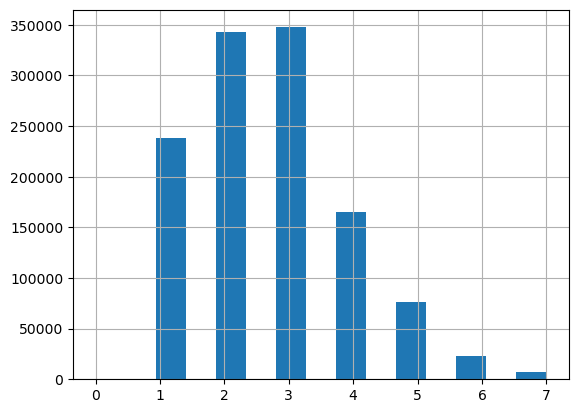

In [34]:
bank1_df['grade'].hist(bins=15)

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sub_grade'}>,
        <AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'home_ownership'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'verification_status'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'addr_state'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'center'

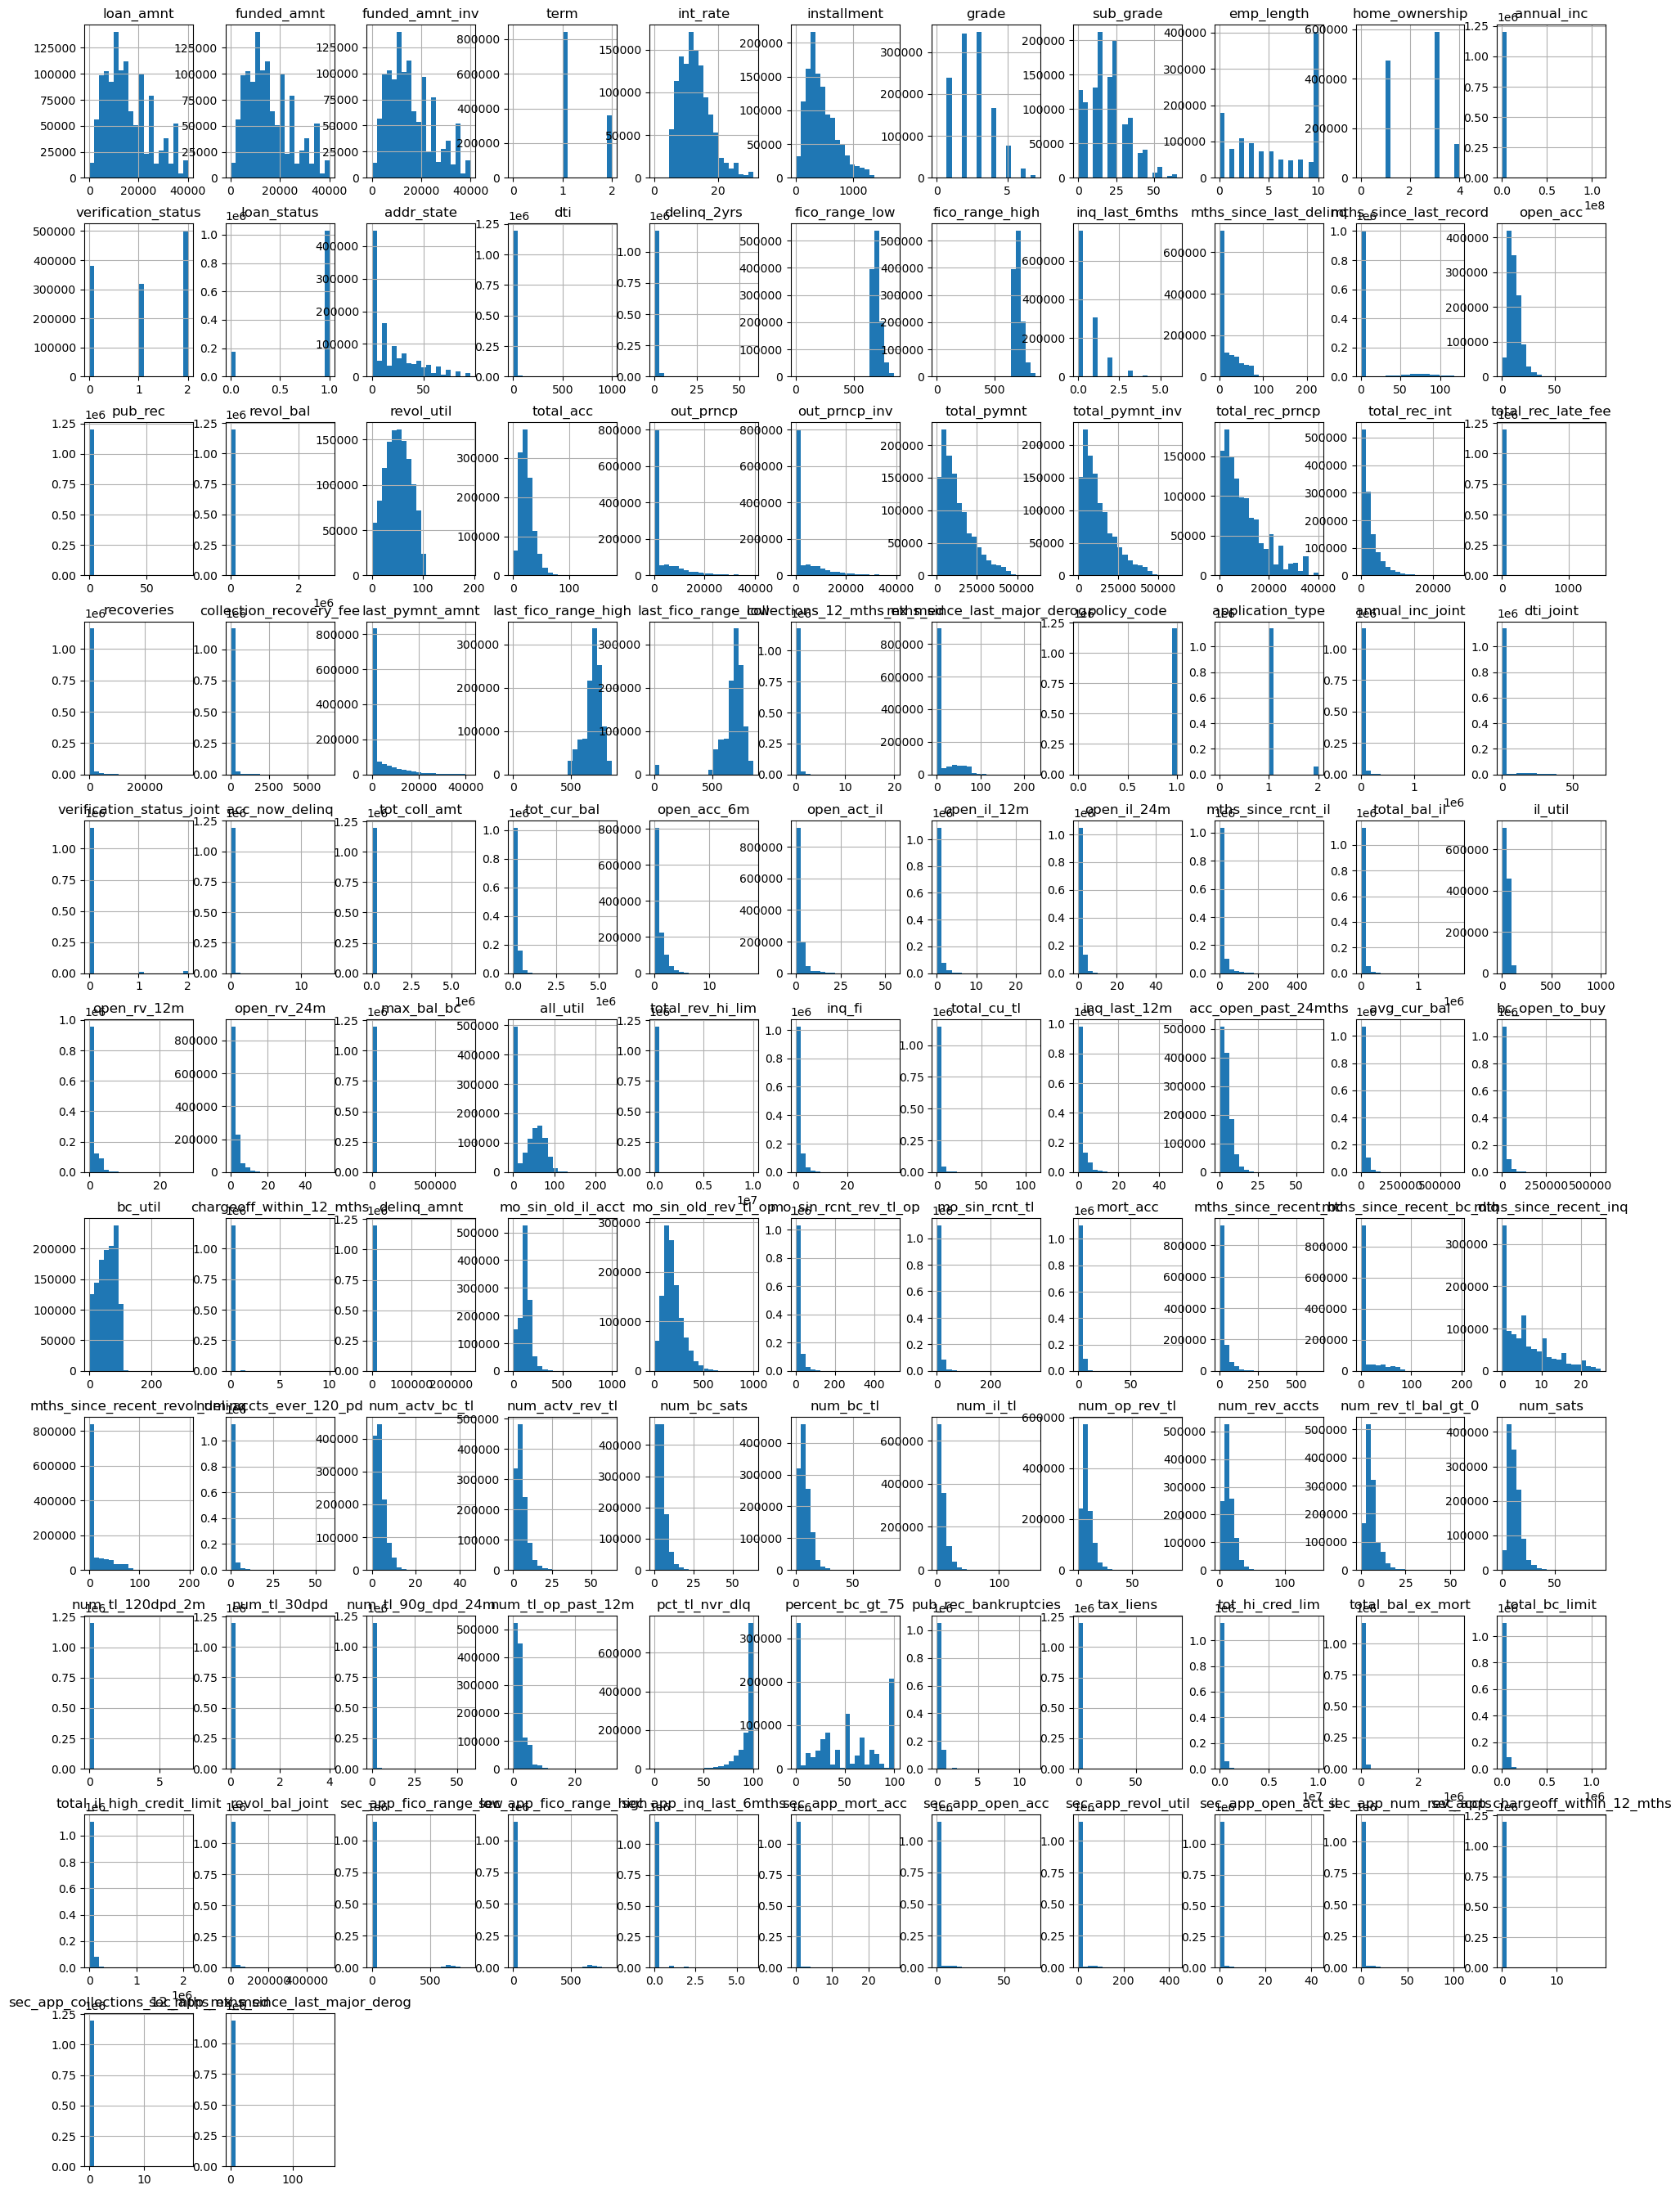

In [35]:
bank1_df.hist(bins=20, figsize= (24,34))

In [27]:
# Review the DataFrame
display(bank1_df.head(3))
print('\n')
display(bank1_df.shape)
print('\n')
display(bank1_df.dtypes)
print('\n')
display(bank1_df.info())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,3600.0,3600.0,3600.0,1.0,13.99,123.03,3.0,24.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,24700.0,24700.0,1.0,11.99,820.28,3.0,21.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,20000.0,20000.0,2.0,10.78,432.66,2.0,14.0,10.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1200000, 112)

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
term                                   float64
int_rate                               float64
                                        ...   
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
Length: 112, dtype: object



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Columns: 112 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(112)
memory usage: 1.0 GB


None

# Create the labels or target set (b1y) from the “loan_status” column, and then create the features (b1X) DataFrame from the remaining columns.

In [7]:
# Define bank1_df target set b1y using the 'loan_status' column
b1y = bank1_df['loan_status']
# Display a sample of target b1y
display(b1y[:5])
display(b1y[:-5])

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: loan_status, dtype: float64

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1199990    1.0
1199991    1.0
1199992    1.0
1199993    1.0
1199994    1.0
Name: loan_status, Length: 1199995, dtype: float64

In [8]:
# Define bank1_df features set b1X
# b1X = bank1_df.drop('loan_status', axis = 1)
b1X = bank1_df.drop(columns = 'loan_status')

# Scale the features and prepare for component analysis (i.e. PCA)

In [9]:
# Generate random_state variable
SEED = 42

In [10]:
# Scale features b1X data with StandardScaler()
b1X_scaled = StandardScaler().fit_transform(b1X)


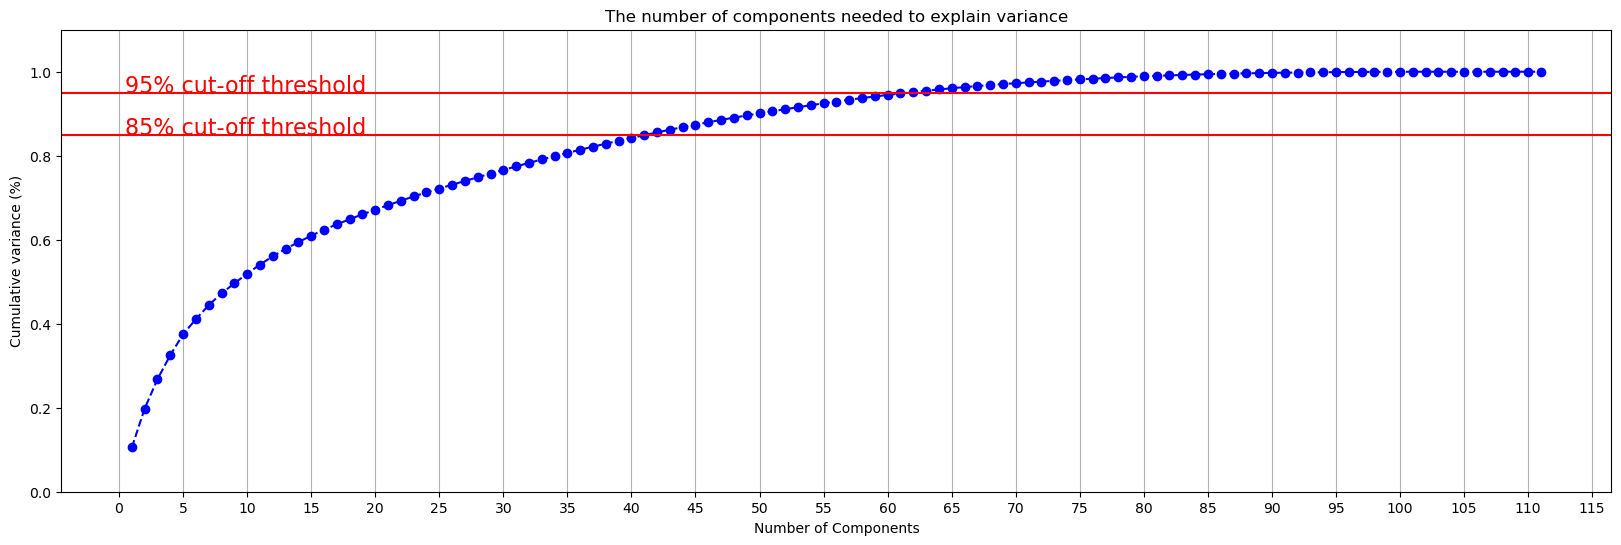

CPU times: user 36.4 s, sys: 5.99 s, total: 42.4 s
Wall time: 6.18 s


In [32]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Determine best n_components value for StandardScaler() data
pca = PCA().fit(b1X_scaled)

plt.rcParams['figure.figsize'] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 112, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 11, step=1))             #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [33]:
# Scale features b1X data with MinMaxScaler()
b1X_scaler = MinMaxScaler()

b1X_mm_scaled = b1X_scaler.fit_transform(b1X)


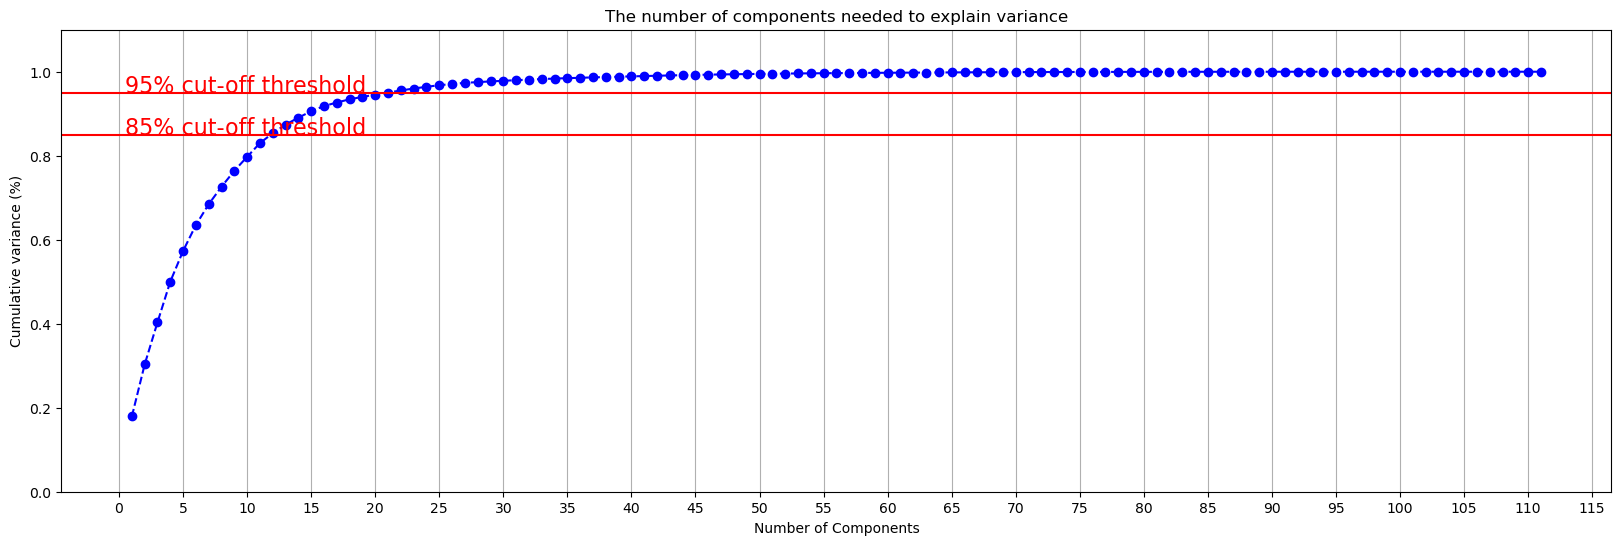

In [34]:
# Determine best n_components value for MinMaxScaler() data

pca = PCA().fit(b1X_mm_scaled)

plt.rcParams['figure.figsize'] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 112, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 11, step=1))             #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Perform Principal Component Analysis (PCA)
95% variance

In [11]:
# Perform PCA on the StandardScaler() features data set b1X_scaled
b1X_scaled_pca = PCA(n_components = 0.95, random_state = SEED)
b1X_scaled_reduced = b1X_scaled_pca.fit_transform(b1X_scaled)
#Use bracket notation ([0:3]) to review three rows of the PCA data
# b1X_scaled_reduced[0:3]

In [36]:
# Calculate the explained variance
# pca.explained_variance_ratio_

In [37]:
# Perform PCA on the MinMaxScaler() features data set b1X_mm_scaled
b1X_mm_scaled_pca = PCA(n_components = 0.95, random_state = SEED)
b1X_mm_scaled_reduced = b1X_mm_scaled_pca.fit_transform(b1X_mm_scaled)
#Use bracket notation ([0:3]) to review three rows of the PCA data
# b1X_mm_scaled_reduced[0:3]

In [38]:
# Calculate the explained variance
# pca.explained_variance_ratio_

# Initiate Machine Learning model testing

In [12]:
# Full PCA dataset
# Split the bank1-df StandardScaler scaled PCA data into training and testing datasets using train_test_split().

b1X_scaled_reduced_train, b1X_scaled_reduced_test, b1y_train, b1y_test = train_test_split(
    b1X_scaled_reduced, b1y, 
    test_size=0.25,                # 75% train : 25% test split
    random_state = SEED
)

In [40]:
# inspect datasets' full and split lengths, i.e. review the split
display(len(b1X_scaled_reduced))            # 1200000
display(len(b1X_scaled_reduced_train))      # 900000
display(len(b1X_scaled_reduced_test))       # 300000

1200000

900000

300000

In [41]:
# Split the bank1-df MinMaxScaler scaled PCA data into training and testing datasets using train_test_split().

b1X_mm_scaled_reduced_train, b1X_mm_scaled_reduced_test, b1y_train, b1y_test = train_test_split(
    b1X_mm_scaled_reduced, b1y, 
    test_size=0.25,                # 75% train : 25% test split
    random_state = SEED
)

In [42]:
# inspect datasets' full and split lengths, i.e. review the split
display(len(b1X_mm_scaled_reduced))            # 1200000
display(len(b1X_mm_scaled_reduced_train))      # 900000
display(len(b1X_mm_scaled_reduced_test))       # 300000

1200000

900000

300000

___
___
# StandardScaler, PCA, LinearSVC classifier model
## Use the LinearSVC classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions

# Bank 1

In [43]:
%%time
# bank1, Standardcaler, PCA - from SVM, instantiate LinearSVC classifier model instance
b1_lsvc = LinearSVC(random_state = SEED, max_iter = 1500, verbose=0)
print(b1_lsvc) 
    
# Fit the model to the data using the training data
b1_lsvc_model = b1_lsvc.fit(b1X_scaled_reduced_train, b1y_train)
score = b1_lsvc.score(b1X_scaled_reduced_train, b1y_train)
print('Score: ', score)

# Use the testing data to make the model predictions
b1_lsvc_predictions = b1_lsvc_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_lsvc_predictions[:50]

LinearSVC(max_iter=1500, random_state=42)
Score:  0.9810511111111111
CPU times: user 5min 52s, sys: 2.41 s, total: 5min 54s
Wall time: 5min 53s


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

[[ 38308   5397]
 [   288 256007]]

balanced accuracy score: 0.9376946398394523

                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.88      1.00      0.93      0.94      0.86     43705
        1.0       0.98      1.00      0.88      0.99      0.94      0.89    256295

avg / total       0.98      0.98      0.89      0.98      0.94      0.88    300000

CPU times: user 2.06 s, sys: 739 ms, total: 2.8 s
Wall time: 854 ms


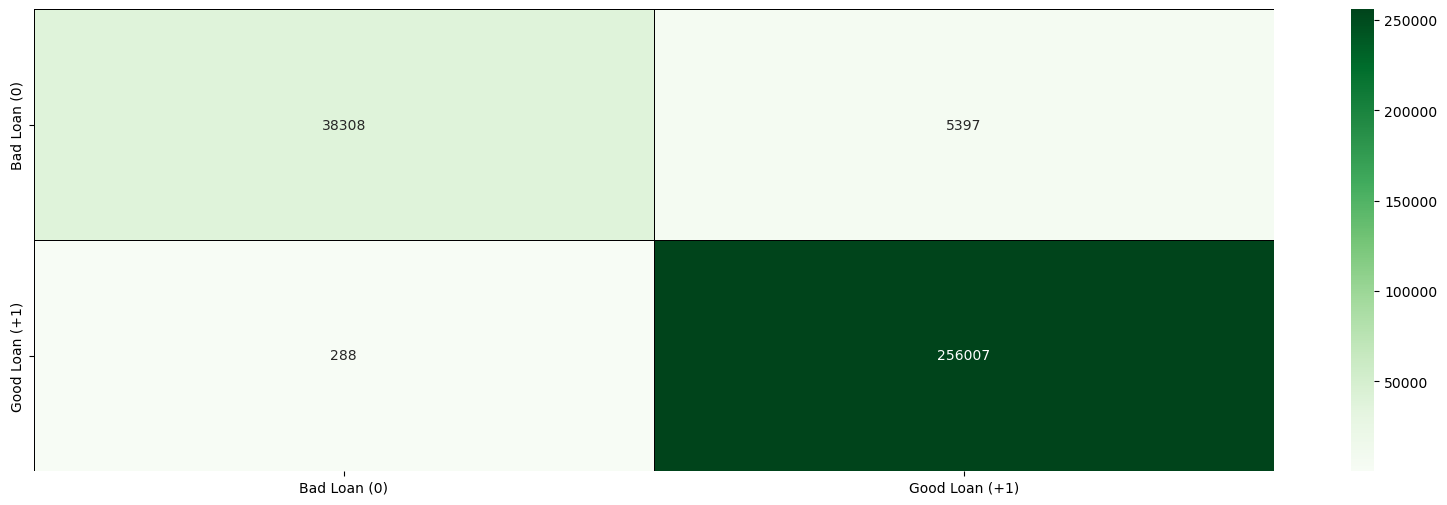

In [44]:
%%time
# Calculate the balanced_accuracy score of the model
b1_lsvc_balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_lsvc_predictions)

# Generate a confusion matrix for the model
b1_lsvc_matrix = confusion_matrix(b1y_test, b1_lsvc_predictions,
                                  labels=[0.0, 1.0])

# Print the confusion matrix for the original test data
print(b1_lsvc_matrix)

# Calculate the classification report for the model
b1_lsvc_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_lsvc_predictions)

# Adding classes names for better interpretation
classes_names = ['Bad Loan (0)', 'Good Loan (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_lsvc_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_lsvc_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_lsvc_imbalance_testing_report) 


In [45]:
%%time
# Save bank1, standardscaler, PCA LinearSVC classifier model - pickle method
# pickle.dump(b1_svm_model, open(Path('./Resources_models/b1_svm_model.pkl'), 'wb'))
b1_lsvc_path = Path('./Resources_models/b1_lsvc_model.pkl')
with open(b1_lsvc_path, 'wb') as file:
    pickle.dump(b1_lsvc_model, file)


CPU times: user 2.21 ms, sys: 795 µs, total: 3 ms
Wall time: 811 µs


In [46]:
%%time
# Save bank1, standardscaler, PCA LinearSVC classifier model - joblib method
b1_lsvc_path = Path('./Resources_models/b1_lsvc_model.joblib')
with open(b1_lsvc_path, 'wb') as file:
    joblib.dump(b1_lsvc_model, file)
    

CPU times: user 3.43 ms, sys: 1.02 ms, total: 4.44 ms
Wall time: 1.11 ms


___
# RandomUnderSampler, StandardScaler, PCA, LinearSVC classifier model
## Use the LinearSVC classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions

# Bank 1

In [47]:
# Count distinct values
b1y_train.value_counts()

1.0    769664
0.0    130336
Name: loan_status, dtype: int64

In [48]:

# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state = SEED)

# Fit the data to the model
b1X_resampled, b1y_resampled = rus.fit_resample(b1X_scaled_reduced_train, b1y_train)

In [49]:
# Count distinct values
b1y_resampled.value_counts()

0.0    130336
1.0    130336
Name: loan_status, dtype: int64

In [50]:
%%time
# bank1, Standardcaler, PCA, undersampled - from SVM, instantiate LinearSVC classifier model instance
b1_resampled_lsvc = LinearSVC(random_state = SEED, max_iter = 1500, verbose=0)
print(b1_resampled_lsvc) 
    
# Fit the model to the data using the training data
b1_resampled_lsvc_model = b1_resampled_lsvc.fit(b1X_resampled, b1y_resampled)
score = b1_resampled_lsvc.score(b1X_resampled, b1y_resampled)
print('Score: ', score)

# Use the testing data to make the model predictions
b1_resampled_lsvc_predictions = b1_resampled_lsvc_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_resampled_lsvc_predictions[:50]

LinearSVC(max_iter=1500, random_state=42)
Score:  0.9564049840412472
CPU times: user 1min 9s, sys: 439 ms, total: 1min 9s
Wall time: 1min 9s


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

[[ 40893   2812]
 [  5519 250776]]

balanced accuracy score: 0.957062878044198

                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.88      0.94      0.98      0.91      0.96      0.91     43705
        1.0       0.99      0.98      0.94      0.98      0.96      0.92    256295

avg / total       0.97      0.97      0.94      0.97      0.96      0.92    300000

CPU times: user 1.46 s, sys: 1.21 s, total: 2.67 s
Wall time: 815 ms


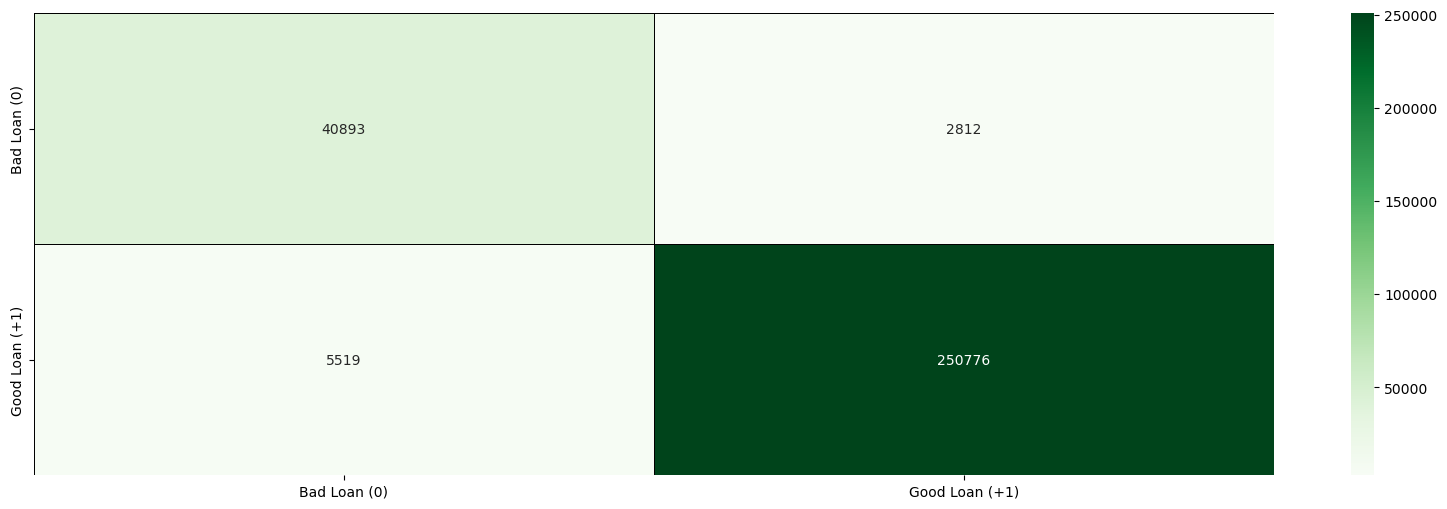

In [51]:
%%time
# Calculate the balanced_accuracy score of the model
b1_resampled_lsvc_balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_resampled_lsvc_predictions)

# Generate a confusion matrix for the model
b1_resampled_lsvc_matrix = confusion_matrix(b1y_test, b1_resampled_lsvc_predictions,
                                  labels=[0.0, 1.0])

# Print the confusion matrix for the original test data
print(b1_resampled_lsvc_matrix)

# Calculate the classification report for the model
b1_resampled_lsvc_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_resampled_lsvc_predictions)

# Adding classes names for better interpretation
classes_names = ['Bad Loan (0)', 'Good Loan (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_resampled_lsvc_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_resampled_lsvc_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_resampled_lsvc_imbalance_testing_report) 


In [52]:
# Save bank1, RandomUnderSampler, StandardScaler, PCA, LinearSVC classifier model - pickle method
b1_resampled_lsvc_path = Path('./Resources_models/b1_resampled_lsvc_model.pkl')
with open(b1_resampled_lsvc_path, 'wb') as file:
    pickle.dump(b1_resampled_lsvc_model, file)


In [ ]:
# Save bank1, RandomUnderSampler, StandardScaler, PCA, LinearSVC classifier model - joblib method
b1_resampled_lsvc_path = Path('./Resources_models/b1_resampled_lsvc_model.joblib')
with open(b1_lsvc_path, 'wb') as file:
    joblib.dump(b1_resampled_lsvc_model, file)
    

___
___
# StandardScaler, PCA, KNeighborsClassifier  model

# Bank 1

Finding the Best K for KNN Classification
create a for loop and run models that have from 1 to X neighbors. At each interaction, calculate the f1 and plot the number of Ks along with the f1 result

In [54]:
%%time
# create an empty set called 'f1s'
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(b1X_scaled_reduced_train, b1y_train)
    pred_i = knn.predict(b1X_scaled_reduced_test)
    # using average = 'weighted' to calculate a weighted average for the classes 
    f1s.append(f1_score(b1y_test, pred_i, average='weighted'))


CPU times: user 13h 46min 10s, sys: 2min 5s, total: 13h 48min 16s
Wall time: 1h 35min 16s


CPU times: user 7.18 ms, sys: 5.4 ms, total: 12.6 ms
Wall time: 10.9 ms


Text(0, 0.5, 'F1 Score')

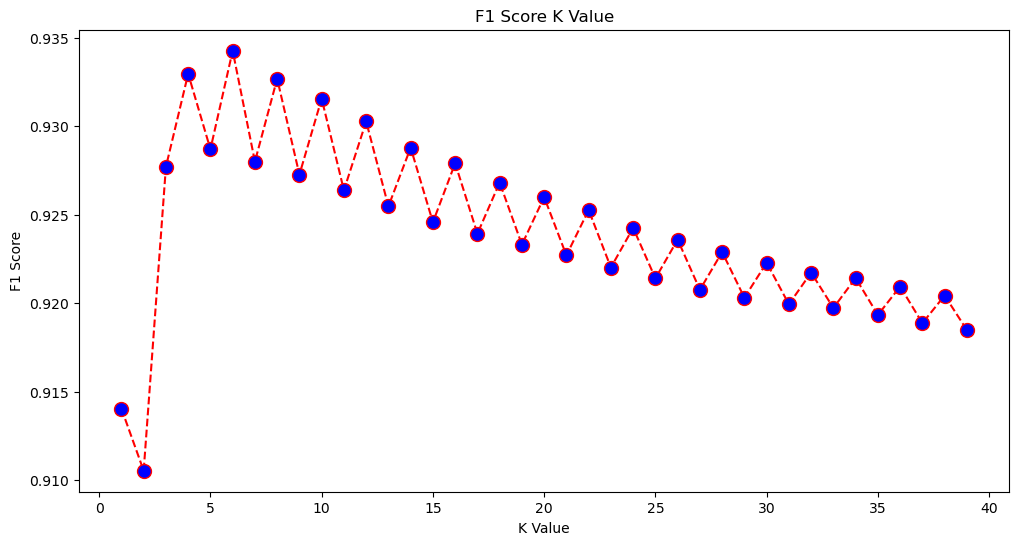

In [55]:
%%time
# plot the f1 values to find the best K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize = 10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Text(0, 0.5, 'F1 Score')

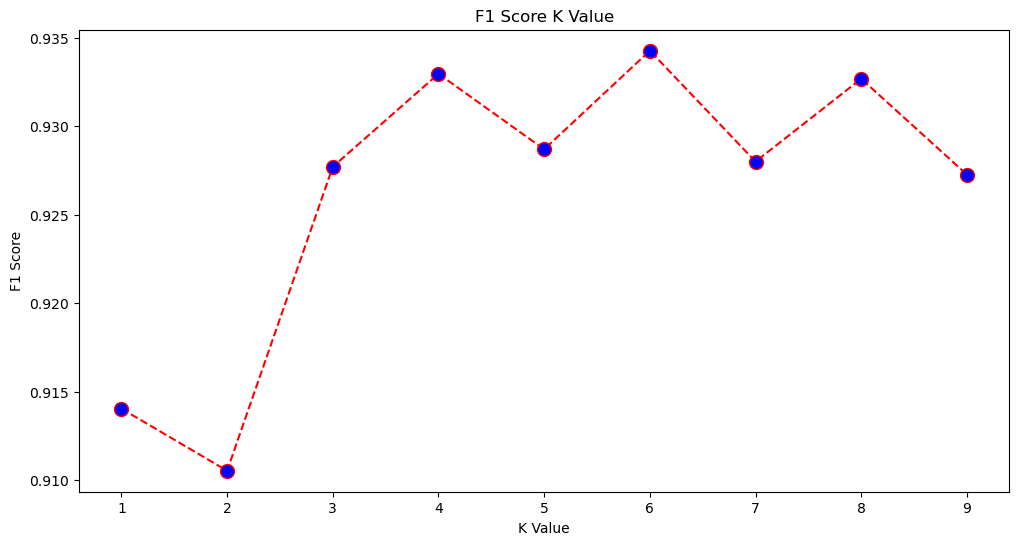

In [56]:
# New f1 plot; shorter or tighter range
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), f1s[0:9], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [57]:
%%time
# bank1, standardscaler, PCA - KNeighborsClassifier model instance
b1_classifier = KNeighborsClassifier(n_neighbors = 6)
print(b1_classifier) 

# Fit the model to the data using the training data
b1_classifier_model = b1_classifier.fit(b1X_scaled_reduced_train, b1y_train)
score = b1_classifier.score(b1X_scaled_reduced_train, b1y_train)
print('Score: ', score) 
    
# Use the testing data to make the model predictions
b1_classifier_predictions = b1_classifier_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_classifier_predictions[:50]

KNeighborsClassifier(n_neighbors=6)
Score:  0.9535011111111111
CPU times: user 1h 26min 18s, sys: 13.1 s, total: 1h 26min 31s
Wall time: 9min 7s


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

[[ 28528  15177]
 [  3297 252998]]

balanced accuracy score: 0.8199379393489037

                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.90      0.65      0.99      0.76      0.80      0.62     43705
        1.0       0.94      0.99      0.65      0.96      0.80      0.67    256295

avg / total       0.94      0.94      0.70      0.93      0.80      0.66    300000

CPU times: user 801 ms, sys: 43.2 ms, total: 844 ms
Wall time: 816 ms


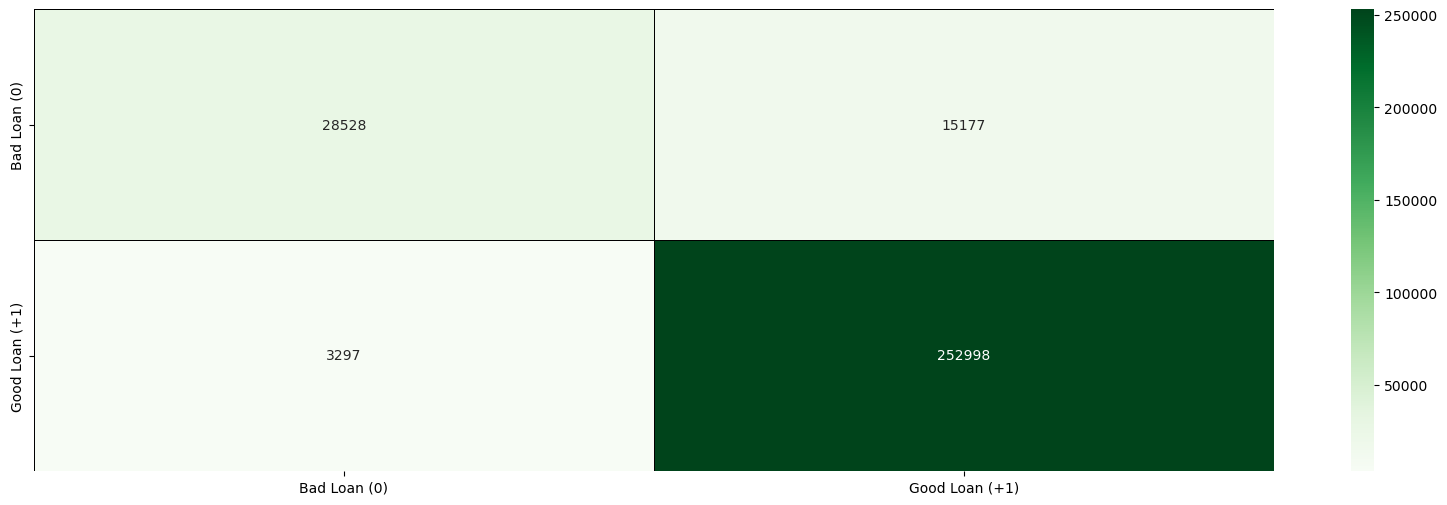

In [58]:
%%time
# Calculate the balanced_accuracy score of the model
b1_classifier_balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_classifier_predictions)

# Generate a confusion matrix for the model
b1_classifier_matrix = confusion_matrix(b1y_test, b1_classifier_predictions, 
                                     labels=[0.0, 1.0])

# Print the confusion matrix for the original test data
print(b1_classifier_matrix)

# Calculate the classification report for the model
b1_classifier_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_classifier_predictions)

# Adding classes names for better interpretation
classes_names = ['Bad Loan (0)', 'Good Loan (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_classifier_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_classifier_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_classifier_imbalance_testing_report) 


In [ ]:
# Save bank1, StandardScaler, PCA, KNeighborsClassifier model - pickle method
b1_classifier_path = Path('./Resources_models/b1_classifier_model.pkl')
with open(b1_classifier_path, 'wb') as file:
    pickle.dump(b1_classifier_model, file)
    

In [ ]:
# Save bank1, StandardScaler, PCA, KNeighborsClassifier model - joblib method
b1_classifier_path = Path('./Resources_models/b1_classifier_model.joblib')
with open(b1_classifier_path, 'wb') as file:
    joblib.dump(b1_classifier_model, file)
    

___
___
# StandardScaler, PCA, LogisticRegression()  model

# Bank 1

In [59]:
%%time
# bank1, Standardcaler, PCA - instantiate LogisticRegression() model
b1_lregress = LogisticRegression(random_state = SEED,  max_iter = 1500, verbose=0)
print(b1_lregress)

# Fit the model to the data using the training data
b1_lregress_model = b1_lregress.fit(b1X_scaled_reduced_train, b1y_train)
score = b1_lregress.score(b1X_scaled_reduced_train, b1y_train)
print('Score: ', score)

# Use the testing data to make the model predictions
b1_lregress_predictions = b1_lregress_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_lregress_predictions[:50]

LogisticRegression(max_iter=1500, random_state=42)
Score:  0.9821777777777778
CPU times: user 2min 15s, sys: 2.04 s, total: 2min 17s
Wall time: 14.7 s


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

[[ 38930   4775]
 [   610 255685]]

balanced accuracy score: 0.9441823481018405

                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      0.89      1.00      0.94      0.94      0.88     43705
        1.0       0.98      1.00      0.89      0.99      0.94      0.90    256295

avg / total       0.98      0.98      0.91      0.98      0.94      0.90    300000

CPU times: user 1.08 s, sys: 1.52 s, total: 2.6 s
Wall time: 807 ms


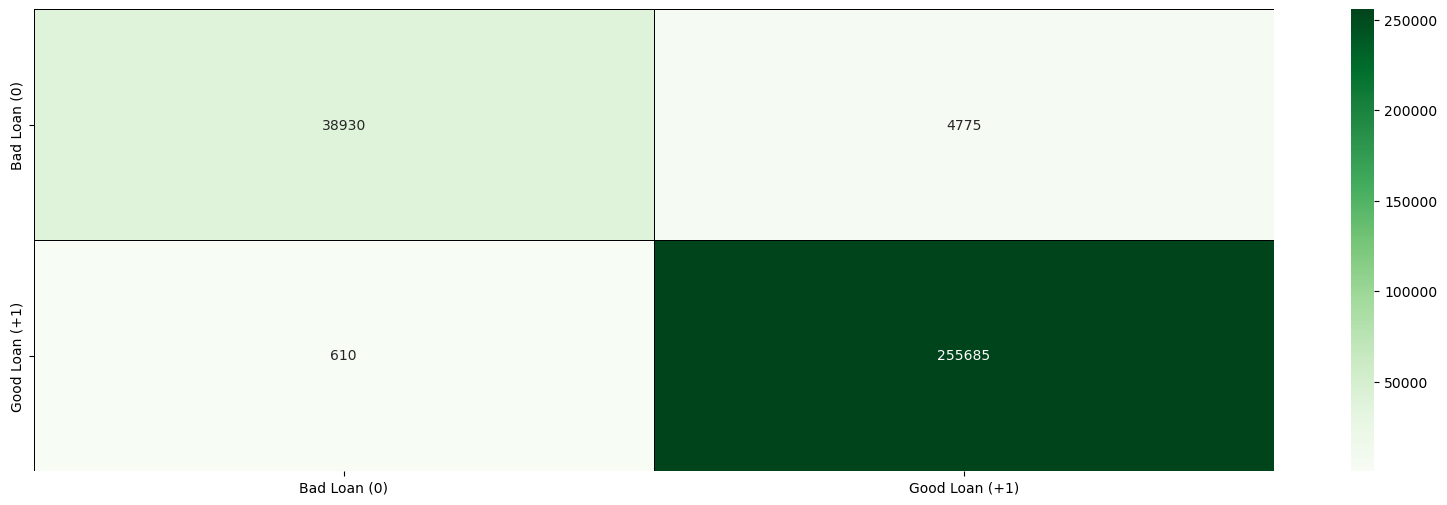

In [60]:
%%time
# Calculate the balanced_accuracy score of the model
b1_lregress_balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_lregress_predictions)

# Generate a confusion matrix for the model
b1_lregress_matrix = confusion_matrix(b1y_test, b1_lregress_predictions, 
                                     labels=[0.0, 1.0])

# Print the confusion matrix for the original test data
print(b1_lregress_matrix)

# Calculate the classification report for the model
b1_lregress_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_lregress_predictions)

# Adding classes names for better interpretation
classes_names = ['Bad Loan (0)', 'Good Loan (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_lregress_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_lregress_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_lregress_imbalance_testing_report) 


In [ ]:
# Save bank1, StandardScaler, PCA, LogisticRegression() model - pickle method
b1_lregress_path = Path('./Resources_models/b1_lregress_model.pkl')
with open(b1_lregress_path, 'wb') as file:
    pickle.dump(b1_lregress_model, file)


In [ ]:
# Save bank1, StandardScaler, PCA, LogisticRegression() model - joblib method
b1_lregress_path = Path('./Resources_models/b1_lregress_model.joblib')
with open(b1_lregress_path, 'wb') as file:
    joblib.dump(b1_lregress_model, file)
    

___
___
# StandardScaler, PCA, AdaBoostClassifier  model

# Bank 1

In [13]:
%%time
# bank1, Standardcaler, PCA - instantiate AdaBoostClassifier model
b1_aboost = AdaBoostClassifier(random_state = SEED)
print(b1_aboost)

# Fit the model to the data using the training data
b1_aboost_model = b1_aboost.fit(b1X_scaled_reduced_train, b1y_train)
score = b1_aboost.score(b1X_scaled_reduced_train, b1y_train)
print('Score: ', score)

# Use the testing data to make the model predictions
b1_aboost_predictions = b1_aboost_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_aboost_predictions[:50]

AdaBoostClassifier(random_state=42)
Score:  0.9458666666666666
CPU times: user 6min 38s, sys: 4.04 s, total: 6min 42s
Wall time: 6min 43s


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

[[ 31486  12219]
 [  3960 252335]]

balanced accuracy score: 0.8524850296309323

                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.72      0.98      0.80      0.84      0.69     43705
        1.0       0.95      0.98      0.72      0.97      0.84      0.73    256295

avg / total       0.94      0.95      0.76      0.94      0.84      0.72    300000

CPU times: user 809 ms, sys: 50 ms, total: 859 ms
Wall time: 832 ms


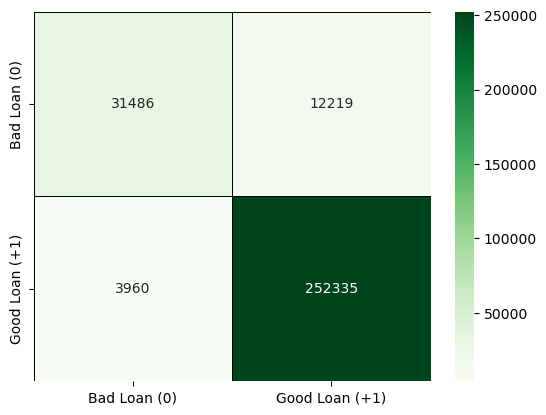

In [14]:
%%time
# Calculate the balanced_accuracy score of the model
b1_aboost_balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_aboost_predictions)

# Generate a confusion matrix for the model
b1_aboost_matrix = confusion_matrix(b1y_test, b1_aboost_predictions, 
                                     labels=[0.0, 1.0])

# Print the confusion matrix for the original test data
print(b1_aboost_matrix)

# Calculate the classification report for the model
b1_aboost_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_aboost_predictions)

# Adding classes names for better interpretation
classes_names = ['Bad Loan (0)', 'Good Loan (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_aboost_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_aboost_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_aboost_imbalance_testing_report) 


In [ ]:
$
hand broken 

In [ ]:
# Save bank1, StandardScaler, PCA, AdaBoostClassifier model - pickle method
b1_aboost_path = Path('./Resources_models/b1_aboost_model.pkl')
with open(b1_aboost_path, 'wb') as file:
    pickle.dump(b1_aboost_model, file)
    

In [ ]:
# Save bank1, StandardScaler, PCA, AdaBoostClassifier model - joblib method
b1_aboost_path = Path('./Resources_models/b1_aboost_model.joblib')
with open(b1_aboost_path, 'wb') as file:
    joblib.dump(b1_aboost_model, file)
    

___
___
# StandardScaler, PCA, SVC classifier model
## Use the SVC classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions
resize datasets to SVC appropriate

In [ ]:
# bank1, standardscaler, PCA - from SVM, instantiate SVC classifier model instance

b1_svm_m = svm.SVC(random_state = SEED)
 
# Fit the model to the data using the training data
b1_svm_model = b1_svm_m.fit(b1X_scaled_reduced_train, b1y_train)
 
# Use the testing data to make the model predictions
b1_svm_predictions = b1_svm_model.predict(b1X_scaled_reduced_test)

# Review the model's predicted values
b1_svm_predictions[:50]

In [ ]:
# Calculate the balanced_accuracy score of the model
b1_svm__balanced_accuracy_score = balanced_accuracy_score(b1y_test, b1_svm_predictions)

# Generate a confusion matrix for the model
b1_svm_matrix = confusion_matrix(b1y_test, b1_svm_predictions)

# Print the confusion matrix for the original test data
print(b1_svm_matrix)

# Calculate the classification report for the model
b1_svm_imbalance_testing_report = classification_report_imbalanced(b1y_test, b1_svm_predictions)

# Adding classes names for better interpretation
classes_names = ['Negative (-1)','Positive (+1)']
cm = pd.DataFrame(confusion_matrix(b1y_test, b1_svm_predictions), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', linewidth =.5, linecolor = 'black')
# Print the balanced_accuracy score of the classifier19 model
print('\nbalanced accuracy score:', b1_svm_balanced_accuracy_score)
# Print the classification report for the classifier19 model
print('\n',b1_svm_imbalance_testing_report) 


In [ ]:
# Save bank1, standardscaler, PCA SVM model - pickle method
# pickle.dump(b1_svm_model, open(Path('./Resources_models/b1_svm_model.pkl'), 'wb'))
b1_svm_path = Path('./Resources_models/b1_svm_model.pkl')
with open(b1_svm_path, 'wb') as file:
    pickle.dump(b1_svm_model, file)


In [ ]:
# Save bank1, standardscaler, PCA SVM model - joblib method
b1_svm_path = Path('./Resources_models/b1_svm_model.joblib')
with open(b1_svm_path, 'wb') as file:
    joblib.dump(b1_svm_model, file)
